In [0]:

import pyspark

In [0]:
from pyspark.context import SparkContext

In [0]:
sc=SparkContext.getOrCreate()

In [0]:
data=sc.textFile('/FileStore/tables/My_Uber_Drives___2016.csv')

In [0]:
df=sc.parallelize('/FileStore/tables/My_Uber_Drives___2016.csv') 


In [0]:
df.cache()

Out[8]: ParallelCollectionRDD[4] at readRDDFromInputStream at PythonRDD.scala:413

In [0]:
# Transformation 
#Filter and create a new RDD
secfile=data.filter(lambda line:"Fort" in line)

In [0]:
secfile

Out[10]: PythonRDD[5] at RDD at PythonRDD.scala:58

In [0]:
secfile.collect()

Out[11]: ['1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain',
 '1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5,',
 '1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies',
 '1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting',
 '1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit']

In [0]:
# Transformation 
#map and create a new RDD 
tsvData=data.map(lambda x : x.replace(",","\t"))
tsvData.take(5)

Out[12]: ['START_DATE*\tEND_DATE*\tCATEGORY*\tSTART*\tSTOP*\tMILES*\tPURPOSE*',
 '1/1/2016 21:11\t1/1/2016 21:17\tBusiness\tFort Pierce\tFort Pierce\t5.1\tMeal/Entertain',
 '1/2/2016 1:25\t1/2/2016 1:37\tBusiness\tFort Pierce\tFort Pierce\t5\t',
 '1/2/2016 20:25\t1/2/2016 20:38\tBusiness\tFort Pierce\tFort Pierce\t4.8\tErrand/Supplies',
 '1/5/2016 17:31\t1/5/2016 17:45\tBusiness\tFort Pierce\tFort Pierce\t4.7\tMeeting']

In [0]:
#ACTIONS 
#reduce
data.reduce(lambda x,y: x+y)

Out[13]: "START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting1/10/2016 18:18,1/10/2016 18:53,Business,Elmhurst,New York,7.5,Meeting1/10/2016 19:12,1/10/2016 19:32,Bus

In [0]:
#find the shortest line
data.reduce(lambda x,y: x if len(x) < len(y) else y)

Out[14]: 'Totals,,,,,12204.7,'

In [0]:
#Action
data.collect()

Out[15]: ['START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*',
 '1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain',
 '1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5,',
 '1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies',
 '1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting',
 '1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit',
 '1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain',
 '1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting',
 '1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting',
 '1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting',
 '1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit',
 '1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting',
 '1/10/2016 18:18,1/10/2016 18:53,Business,Elm

In [0]:
mydf=sqlContext.sql("Select * from uber_csv")

In [0]:
mydf.collect()

Out[19]: [Row(START_DATE*='1/1/2016 21:11', END_DATE*='1/1/2016 21:17', CATEGORY*='Business', START*='Fort Pierce', STOP*=None, MILES*=5.1, PURPOSE*='Meal/Entertain'),
 Row(START_DATE*='1/2/2016 1:25', END_DATE*='1/2/2016 1:37', CATEGORY*='Business', START*='Fort Pierce', STOP*=None, MILES*=5.0, PURPOSE*=None),
 Row(START_DATE*='1/2/2016 20:25', END_DATE*='1/2/2016 20:38', CATEGORY*='Business', START*='Fort Pierce', STOP*=None, MILES*=4.8, PURPOSE*='Errand/Supplies'),
 Row(START_DATE*='1/5/2016 17:31', END_DATE*='1/5/2016 17:45', CATEGORY*='Business', START*='Fort Pierce', STOP*=None, MILES*=4.7, PURPOSE*='Meeting'),
 Row(START_DATE*='1/6/2016 14:42', END_DATE*='1/6/2016 15:49', CATEGORY*='Business', START*='Fort Pierce', STOP*=None, MILES*=63.7, PURPOSE*='Customer Visit'),
 Row(START_DATE*='1/6/2016 17:15', END_DATE*='1/6/2016 17:19', CATEGORY*='Business', START*='West Palm Beach', STOP*=None, MILES*=4.3, PURPOSE*='Meal/Entertain'),
 Row(START_DATE*='1/6/2016 17:30', END_DATE*='1/6/20

In [0]:
mydf.printSchema()

root
 |-- START_DATE*: string (nullable = true)
 |-- END_DATE*: string (nullable = true)
 |-- CATEGORY*: string (nullable = true)
 |-- START*: string (nullable = true)
 |-- STOP*: integer (nullable = true)
 |-- MILES*: double (nullable = true)
 |-- PURPOSE*: string (nullable = true)



In [0]:
mydf.columns

Out[22]: ['START_DATE*',
 'END_DATE*',
 'CATEGORY*',
 'START*',
 'STOP*',
 'MILES*',
 'PURPOSE*']

In [0]:
mydf.describe

Out[23]: <bound method DataFrame.describe of DataFrame[START_DATE*: string, END_DATE*: string, CATEGORY*: string, START*: string, STOP*: int, MILES*: double, PURPOSE*: string]>

In [0]:
mydf.describe().show()

+-------+--------------+--------------+---------+-------------+-----+-----------------+--------------+
|summary|   START_DATE*|     END_DATE*|CATEGORY*|       START*|STOP*|           MILES*|      PURPOSE*|
+-------+--------------+--------------+---------+-------------+-----+-----------------+--------------+
|  count|          1156|          1155|     1155|         1155|    0|             1156|           653|
|   mean|          null|          null|     null|         null| null|21.11539792387542|          null|
| stddev|          null|          null|     null|         null| null|359.2990073950659|          null|
|    min|1/1/2016 21:11|1/1/2016 21:17| Business|        Agnew| null|              0.5|Airport/Travel|
|    max|        Totals|9/6/2016 17:49| Personal|Winston Salem| null|          12204.7|Temporary Site|
+-------+--------------+--------------+---------+-------------+-----+-----------------+--------------+



In [0]:
mydf.cache()

Out[25]: DataFrame[START_DATE*: string, END_DATE*: string, CATEGORY*: string, START*: string, STOP*: int, MILES*: double, PURPOSE*: string]

In [0]:
df = spark.read.csv("/FileStore/tables/My_Uber_Drives___2016.csv",header=True)

df.show()


+---------------+---------------+---------+-----------------+---------------+------+---------------+
|    START_DATE*|      END_DATE*|CATEGORY*|           START*|          STOP*|MILES*|       PURPOSE*|
+---------------+---------------+---------+-----------------+---------------+------+---------------+
| 1/1/2016 21:11| 1/1/2016 21:17| Business|      Fort Pierce|    Fort Pierce|   5.1| Meal/Entertain|
|  1/2/2016 1:25|  1/2/2016 1:37| Business|      Fort Pierce|    Fort Pierce|     5|           null|
| 1/2/2016 20:25| 1/2/2016 20:38| Business|      Fort Pierce|    Fort Pierce|   4.8|Errand/Supplies|
| 1/5/2016 17:31| 1/5/2016 17:45| Business|      Fort Pierce|    Fort Pierce|   4.7|        Meeting|
| 1/6/2016 14:42| 1/6/2016 15:49| Business|      Fort Pierce|West Palm Beach|  63.7| Customer Visit|
| 1/6/2016 17:15| 1/6/2016 17:19| Business|  West Palm Beach|West Palm Beach|   4.3| Meal/Entertain|
| 1/6/2016 17:30| 1/6/2016 17:35| Business|  West Palm Beach|     Palm Beach|   7.1|       

In [0]:

from pyspark.sql.functions import spark_partition_id

df_update = df.repartitionByRange("START_DATE*","MILES*")

df_update.select("START_DATE*","MILES*",spark_partition_id()).show()
df.rdd.getNumPartitions()

+---------------+------+--------------------+
|    START_DATE*|MILES*|SPARK_PARTITION_ID()|
+---------------+------+--------------------+
| 1/1/2016 21:11|   5.1|                   0|
| 1/10/2016 8:05|   8.3|                   0|
|1/10/2016 12:17|  16.5|                   0|
|1/10/2016 15:08|  10.8|                   0|
|1/10/2016 18:18|   7.5|                   0|
|1/10/2016 19:12|   6.2|                   0|
| 1/11/2016 8:55|   6.4|                   0|
|1/11/2016 11:56|   1.6|                   0|
|1/11/2016 13:32|   1.7|                   0|
|1/11/2016 14:30|   1.9|                   0|
|1/12/2016 12:33|   1.9|                   0|
|1/12/2016 12:53|     4|                   0|
|1/12/2016 14:42|   1.8|                   0|
|1/12/2016 15:13|   2.4|                   0|
|1/12/2016 15:42|     2|                   0|
|1/12/2016 16:02|  15.1|                   0|
|1/13/2016 13:54|  11.2|                   0|
|1/13/2016 15:00|  11.8|                   0|
|1/14/2016 16:29|  21.9|          

In [0]:
#Create a SQL Context from Spark context
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

/databricks/spark/python/pyspark/sql/context.py:82: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [0]:
#SQL queries
mydf.select("CATEGORY*").show()

+---------+
|CATEGORY*|
+---------+
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
| Business|
+---------+
only showing top 20 rows



In [0]:
mydf.filter(mydf["PURPOSE*"] == "Meeting").show()

+---------------+---------------+---------+-------------------+-----+------+--------+
|    START_DATE*|      END_DATE*|CATEGORY*|             START*|STOP*|MILES*|PURPOSE*|
+---------------+---------------+---------+-------------------+-----+------+--------+
| 1/5/2016 17:31| 1/5/2016 17:45| Business|        Fort Pierce| null|   4.7| Meeting|
| 1/6/2016 17:30| 1/6/2016 17:35| Business|    West Palm Beach| null|   7.1| Meeting|
| 1/7/2016 13:27| 1/7/2016 13:33| Business|               Cary| null|   0.8| Meeting|
| 1/10/2016 8:05| 1/10/2016 8:25| Business|               Cary| null|   8.3| Meeting|
|1/10/2016 15:08|1/10/2016 15:51| Business|           New York| null|  10.8| Meeting|
|1/10/2016 18:18|1/10/2016 18:53| Business|           Elmhurst| null|   7.5| Meeting|
|1/10/2016 19:12|1/10/2016 19:32| Business|            Midtown| null|   6.2| Meeting|
|1/12/2016 16:02|1/12/2016 17:00| Business|           New York| null|  15.1| Meeting|
|1/13/2016 13:54|1/13/2016 14:07| Business|           

In [0]:
mydf.groupBy("MILES*").\
    agg({"MILES*": "avg", "START_DATE*": "max"}).show()

+------+------------------+----------------+
|MILES*|       avg(MILES*)|max(START_DATE*)|
+------+------------------+----------------+
|   0.5|               0.5|  6/8/2016 17:16|
|   0.6|               0.6|  7/5/2016 16:48|
|   0.7|0.7000000000000001| 9/14/2016 11:55|
|   0.8|0.7999999999999999|  3/4/2016 16:16|
|   0.9|0.9000000000000001| 9/15/2016 20:33|
|   1.0|               1.0|  8/2/2016 21:23|
|   1.1|1.0999999999999999|  8/3/2016 14:59|
|   1.2|               1.2| 8/16/2016 10:31|
|   1.3|               1.3|  8/5/2016 17:23|
|   1.4|               1.4| 8/21/2016 18:10|
|   1.5|               1.5|  8/5/2016 19:17|
|   1.6|               1.6|  9/16/2016 7:08|
|   1.7|1.6999999999999995| 9/12/2016 11:15|
|   1.8|1.8000000000000003|  8/5/2016 18:17|
|   1.9|1.8999999999999995| 8/23/2016 15:07|
|   2.0|               2.0|  8/3/2016 12:46|
|   2.1|2.1000000000000005| 8/30/2016 11:53|
|   2.2|               2.2|  9/1/2016 18:49|
|   2.3|2.3000000000000003|  7/28/2016 0:04|
|   2.4|  

In [0]:
#create a data frame from a list
ride = [{'MILES*':2.0,'PURPOSE*':"Customer Visit"},\
     {'MILES*':21.0,'PURPOSE*':"Meeting"}]
ridesDf = sqlContext.createDataFrame(ride)
ridesDf.show()

+------+--------------+
|MILES*|      PURPOSE*|
+------+--------------+
|   2.0|Customer Visit|
|  21.0|       Meeting|
+------+--------------+



In [0]:
#user-defined function (UDF)
def cleanseRDD(Str) :
    if isinstance(Str, int) :
        return Str
    attList=Str.split(",")
    #convert doors to a number
    if attList[3] == "two" :
         attList[3]="2"
    else :
         attList[3]="4"
    #Convert Drive to uppercase
    attList[5] = attList[5].upper()
    return ",".join(attList)
    
cleanedData=data.map(cleanseRDD)
cleanedData.collect()

Out[34]: ['START_DATE*,END_DATE*,CATEGORY*,4,STOP*,MILES*,PURPOSE*',
 '1/1/2016 21:11,1/1/2016 21:17,Business,4,Fort Pierce,5.1,Meal/Entertain',
 '1/2/2016 1:25,1/2/2016 1:37,Business,4,Fort Pierce,5,',
 '1/2/2016 20:25,1/2/2016 20:38,Business,4,Fort Pierce,4.8,Errand/Supplies',
 '1/5/2016 17:31,1/5/2016 17:45,Business,4,Fort Pierce,4.7,Meeting',
 '1/6/2016 14:42,1/6/2016 15:49,Business,4,West Palm Beach,63.7,Customer Visit',
 '1/6/2016 17:15,1/6/2016 17:19,Business,4,West Palm Beach,4.3,Meal/Entertain',
 '1/6/2016 17:30,1/6/2016 17:35,Business,4,Palm Beach,7.1,Meeting',
 '1/7/2016 13:27,1/7/2016 13:33,Business,4,Cary,0.8,Meeting',
 '1/10/2016 8:05,1/10/2016 8:25,Business,4,Morrisville,8.3,Meeting',
 '1/10/2016 12:17,1/10/2016 12:44,Business,4,New York,16.5,Customer Visit',
 '1/10/2016 15:08,1/10/2016 15:51,Business,4,Queens,10.8,Meeting',
 '1/10/2016 18:18,1/10/2016 18:53,Business,4,New York,7.5,Meeting',
 '1/10/2016 19:12,1/10/2016 19:32,Business,4,East Harlem,6.2,Meeting',
 '1/11/20

In [0]:
#join the data frames
mydf.join(ridesDf,"PURPOSE*").show()

+--------------+----------------+----------------+---------+----------------+-----+------+------+
|      PURPOSE*|     START_DATE*|       END_DATE*|CATEGORY*|          START*|STOP*|MILES*|MILES*|
+--------------+----------------+----------------+---------+----------------+-----+------+------+
|Customer Visit|12/30/2016 23:06|12/30/2016 23:10| Business|         Kar?chi| null|   0.8|   2.0|
|Customer Visit|12/29/2016 19:50|12/29/2016 20:10| Business|Unknown Location| null|   4.1|   2.0|
|Customer Visit|12/27/2016 19:19|12/27/2016 19:50| Business|         Kar?chi| null|   5.5|   2.0|
|Customer Visit|12/27/2016 14:49|12/27/2016 15:03| Business|         Kar?chi| null|   3.1|   2.0|
|Customer Visit|12/26/2016 11:29|12/26/2016 11:42| Business|          Lahore| null|   3.8|   2.0|
|Customer Visit|12/26/2016 10:15|12/26/2016 10:36| Business|          Lahore| null|   7.7|   2.0|
|Customer Visit| 12/26/2016 9:05| 12/26/2016 9:19| Business|          Lahore| null|   6.2|   2.0|
|Customer Visit|12/2

In [0]:
#Create visualizations using  Databricks
sdf = spark.sql("select * from uber_csv limit 10")
display(sdf)

START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,null,5.1,Meal/Entertain
1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,null,5.0,null
1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,null,4.8,Errand/Supplies
1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,null,4.7,Meeting
1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,null,63.7,Customer Visit
1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,null,4.3,Meal/Entertain
1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,null,7.1,Meeting
1/7/2016 13:27,1/7/2016 13:33,Business,Cary,null,0.8,Meeting
1/10/2016 8:05,1/10/2016 8:25,Business,Cary,null,8.3,Meeting
1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,null,16.5,Customer Visit


In [0]:
    
#Initialize accumulator
LCount = sc.accumulator(0)
ICount =sc.accumulator(0)

#Set Broadcast variable
LText=sc.broadcast("Lahore")
IText=sc.broadcast("Islamabad")



In [0]:
def splitLines(line) :

    global LCount
    global ICount

    #Use broadcast variable to do comparison and set accumulator
    if LText.value in line:
        LCount +=1
    if IText.value in line:
        ICount +=1
        
    return line.split(",")


#do the map
splitData=data.map(splitLines)

#Make it execute the map (lazy execution)
splitData.count()
print (LCount, ICount)

90 180


In [0]:
#Remove the first line (contains headers)
firstLine = data.first()
dataLines = data.filter(lambda x: x != firstLine)
dataLines.count()

Out[59]: 1156

In [0]:
#Convert the RDD into a Dense Vector. As a part of this exercise
import math
from pyspark.ml.linalg import Vectors, VectorUDT


In [0]:
# Change labels to numeric ones

def transformToNumeric( inputStr) :
    attList=inputStr.split(",")
    
    #Set default 
    iValue=1.0
    if attList[4] == "Lahore":
        irisValue=2.0
    if attList[4] == "Islamabad":
        iValue=3.0
       
    #Filter out columns not wanted at this stage
    values= Vectors.dense([ iValue, \
                     float(attList[0]),  \
                     float(attList[1]),  \
                     float(attList[2]),  \
                     float(attList[3])  \
                     ])
    return values

In [0]:
#Change to a Vector
iVectors = dataLines.map(transformToNumeric)


In [0]:
#Transform to a Data Frame for input to Machine Learing
#Drop columns that are not required (low correlation)

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

def transformToLabeledPoint(inStr) :
    attList=inStr.split(",")
    lp = ( attList[4], Vectors.dense([attList[0],attList[2],attList[3]]))
    return lp


In [0]:

#Split into training and testing data
(trainingData, testData) = data.randomSplit([0.9, 0.1])
trainingData.count()
testData.count()
testData.collect()

Out[79]: ['1/14/2016 16:29,1/14/2016 17:05,Business,Houston,Houston,21.9,Customer Visit',
 '1/26/2016 10:41,1/26/2016 10:50,Business,Whitebridge,Hazelwood,2,Meal/Entertain',
 '1/27/2016 12:34,1/27/2016 12:44,Business,Fairmont,Meredith Townes,3.4,Customer Visit',
 '1/30/2016 18:09,1/30/2016 18:24,Business,Apex,Cary,5.7,Customer Visit',
 '2/4/2016 15:59,2/4/2016 16:03,Business,Cary,Cary,1.1,Meal/Entertain',
 '2/4/2016 16:35,2/4/2016 16:39,Business,Cary,Cary,1.6,Meal/Entertain',
 '2/5/2016 11:47,2/5/2016 12:07,Business,Cary,Durham,10.4,Meeting',
 '2/12/2016 8:21,2/12/2016 8:42,Business,Cary,Durham,8.5,Temporary Site',
 '2/12/2016 14:49,2/12/2016 15:06,Business,Cary,Morrisville,8.4,Meeting',
 '2/20/2016 19:28,2/20/2016 19:49,Business,Unknown Location,Unknown Location,7.7,Errand/Supplies',
 '2/21/2016 23:15,2/21/2016 23:52,Business,Unknown Location,R?walpindi,20,Meeting',
 '2/28/2016 9:26,2/28/2016 9:42,Business,Waverly Place,Whitebridge,6.8,Meeting',
 '2/29/2016 11:30,2/29/2016 11:40,Busin

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext


df=spark.read.option('header','true').csv('/FileStore/tables/My_Uber_Drives___2016.csv')
df.show(10) 

+---------------+---------------+---------+---------------+---------------+------+---------------+
|    START_DATE*|      END_DATE*|CATEGORY*|         START*|          STOP*|MILES*|       PURPOSE*|
+---------------+---------------+---------+---------------+---------------+------+---------------+
| 1/1/2016 21:11| 1/1/2016 21:17| Business|    Fort Pierce|    Fort Pierce|   5.1| Meal/Entertain|
|  1/2/2016 1:25|  1/2/2016 1:37| Business|    Fort Pierce|    Fort Pierce|     5|           null|
| 1/2/2016 20:25| 1/2/2016 20:38| Business|    Fort Pierce|    Fort Pierce|   4.8|Errand/Supplies|
| 1/5/2016 17:31| 1/5/2016 17:45| Business|    Fort Pierce|    Fort Pierce|   4.7|        Meeting|
| 1/6/2016 14:42| 1/6/2016 15:49| Business|    Fort Pierce|West Palm Beach|  63.7| Customer Visit|
| 1/6/2016 17:15| 1/6/2016 17:19| Business|West Palm Beach|West Palm Beach|   4.3| Meal/Entertain|
| 1/6/2016 17:30| 1/6/2016 17:35| Business|West Palm Beach|     Palm Beach|   7.1|        Meeting|
| 1/7/2016

In [0]:
df.describe()

Out[100]: DataFrame[summary: string, START_DATE*: string, END_DATE*: string, CATEGORY*: string, START*: string, STOP*: string, MILES*: string, PURPOSE*: string]

In [0]:
df1=df.toPandas()

In [0]:
df1

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5,None
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [0]:
df1.isnull().sum()

Out[103]: START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   START_DATE*  1156 non-null   object
 1   END_DATE*    1155 non-null   object
 2   CATEGORY*    1155 non-null   object
 3   START*       1155 non-null   object
 4   STOP*        1155 non-null   object
 5   MILES*       1156 non-null   object
 6   PURPOSE*     653 non-null    object
dtypes: object(7)
memory usage: 63.3+ KB


In [0]:
#remove null value
df1['END_DATE*'] = df1['END_DATE*'].fillna('NA')
df1['CATEGORY*'] = df1['CATEGORY*'].fillna('NA')
df1['START*']    = df1['START*'].fillna('NA')
df1['STOP*'] = df1['STOP*'].fillna('NA')
df1['MILES*'] = df1['MILES*'].fillna('NA')
df1['PURPOSE*'] = df1['PURPOSE*'].fillna('NA')

In [0]:
df1.isnull().sum()

Out[106]: START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Out[110]: <AxesSubplot:>

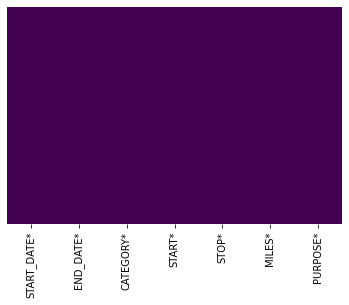

In [0]:
# Heatmap to check missing values 
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Out[111]: <AxesSubplot:xlabel='START*', ylabel='Count'>

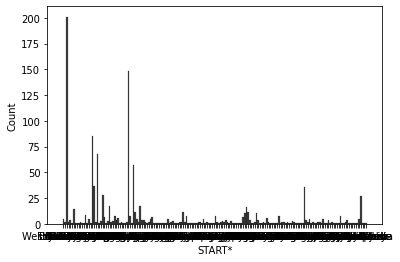

In [0]:
sns.histplot(data=df1['START*'],color='black')

Out[116]: <AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

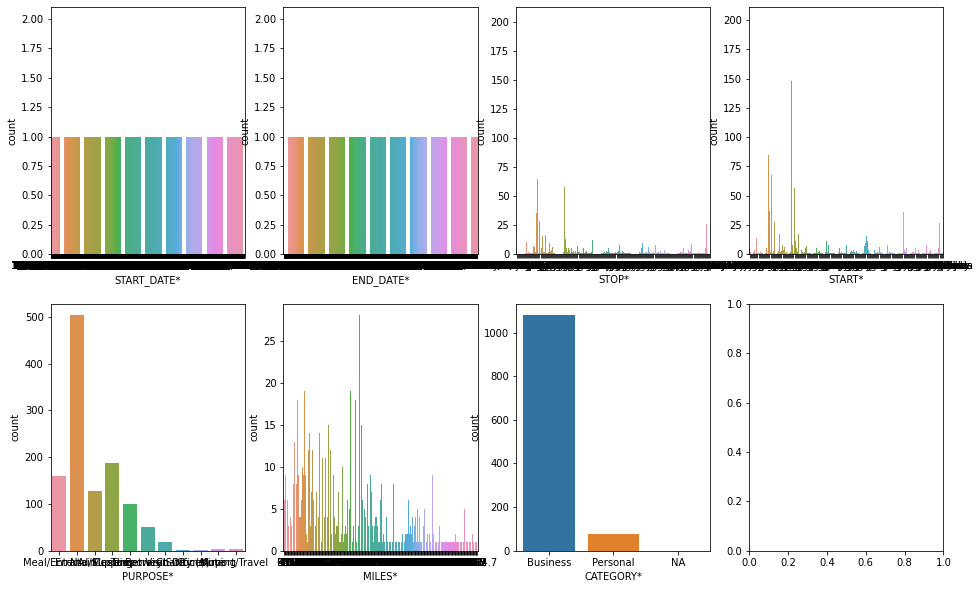

In [0]:
# Univariate Analysis:
# categorical attributes visualization
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='START_DATE*', data = df1, ax=ax[0][0])
sns.countplot(x='END_DATE*', data = df1, ax=ax[0][1])
sns.countplot(x='STOP*', data = df1, ax=ax[0][2])
sns.countplot(x='START*', data = df1, ax=ax[0][3])
sns.countplot(x='PURPOSE*', data = df1, ax=ax[1][0])
sns.countplot(x='MILES*', data = df1, ax=ax[1][1])
sns.countplot(x='CATEGORY*', data = df1, ax=ax[1][2])

Out[121]: <AxesSubplot:xlabel='MILES*', ylabel='Density'>

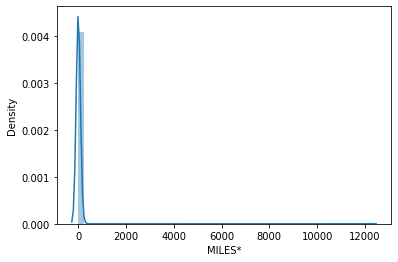

In [0]:
# numerical attributes visualization
sns.distplot(df1["MILES*"])
sns.distplot(df1[""])

Out[142]: <AxesSubplot:xlabel='START*', ylabel='Density'>

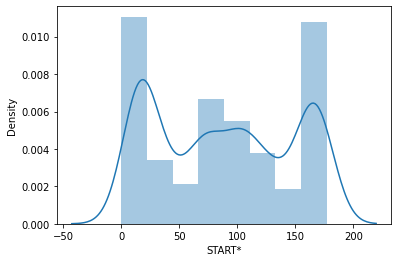

In [0]:
sns.distplot(df1["START*"])

Out[143]: <AxesSubplot:xlabel='CATEGORY*', ylabel='Density'>

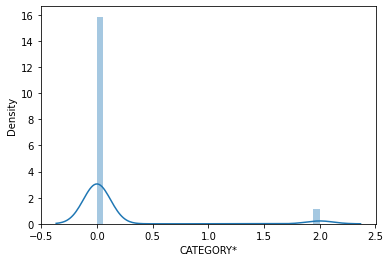

In [0]:
sns.distplot(df1["CATEGORY*"])

In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ["START_DATE*","END_DATE*","CATEGORY*","START*","STOP*","MILES*","PURPOSE*"]
le = LabelEncoder()
for col in cols:
    df1[col] = le.fit_transform(df1[col])

In [0]:
df1.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,0,0,0,52,49,197,6
1,27,27,0,52,49,196,9
2,28,28,0,52,49,182,5
3,56,56,0,52,49,181,7
4,57,57,0,52,182,218,4


In [0]:
#Train-Test Split
# specify input and output attributes
X = df1.drop(columns=['STOP*'], axis=1)
y = df1['START*']


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 28.719723183391004
Cross validation is 25.86505448574414


In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 85.46712802768167
Cross validation is 87.72018211673384


Out[133]: <AxesSubplot:>

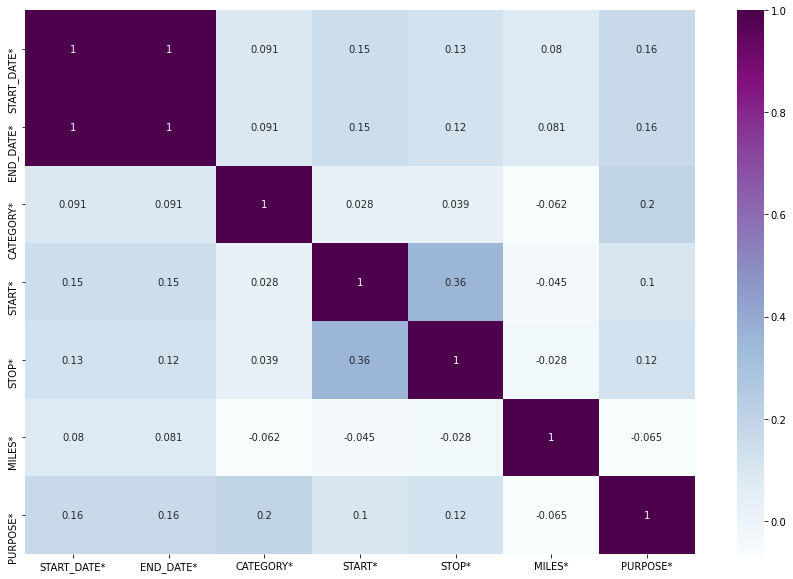

In [0]:
#Coorelation Matrix
corr = df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [0]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 73.01038062283737
Cross validation is 68.00194058814748


In [0]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 75.4325259515571
Cross validation is 68.17211524108076


In [0]:
modelrm = RandomForestClassifier()
modelrm.fit(x_train, y_train)

Out[138]: RandomForestClassifier()

In [0]:
y_pred=modelrm.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",modelrm.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
          10       0.88      1.00      0.93         7
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         1
          15       1.00      0.50      0.67         2
          17       0.94      1.00      0.97        49
          18       1.00      1.00      1.00         5
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       1.00      1.00      1.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         1
          30       1.00      1.00      1.00         1
          32       0.00      0.00      0.00         1


Out[140]: Text(0.5, 15.0, 'Predicted label')

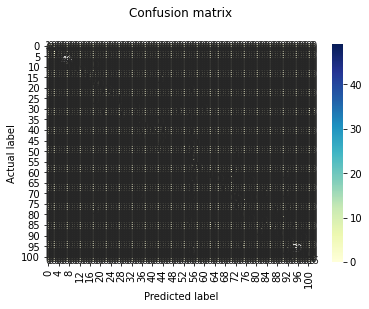

In [0]:
ypred = modelrm.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')